Matplotlib은 한글 폰트를 지원하지 않는 문제가 있다.
- 데이터의 내용중 한글 데이터가 들어가 있으면 네모박스로 표시되어 한글 폰트가 깨지는 현상이 발생.
- 이와 같은 오류를 해결하려면 한글 폰트를 지원하는 코드를 추가해 주어야 함.


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,153 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [2]:
import pandas as pd

#movie_df = pd.read_csv('movies_train.csv')
movie_df = pd.read_csv('/content/drive/MyDrive/data/movies_train.csv')
movie_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
#천만 관중을 달성한 영화의 영화제목과 관중수를 그래프로 나타내기

ten_million_df = movie_df[movie_df["box_off_num"] >= 10000000][['title','box_off_num']]
ten_million_df 

,title,box_off_num
122,변호인,11374879
362,도둑들,12983841
372,국제시장,14262766
460,"광해, 왕이 된 남자",12323595
498,암살,12706663
530,7번방의 선물,12811435


<BarContainer object of 6 artists>

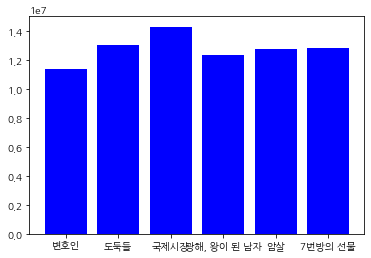

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.bar(ten_million_df ['title'], ten_million_df ['box_off_num'], color='blue')


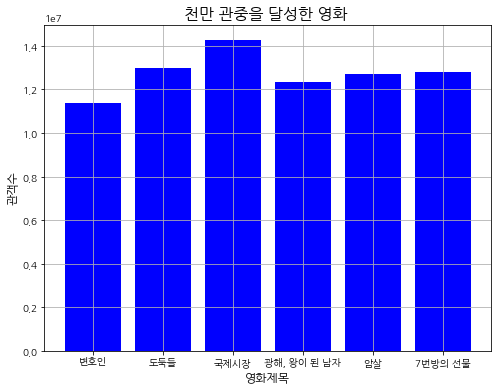

In [ ]:
#import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.rc('font', family='NanumGothic')
plt.bar(ten_million_df['title'], ten_million_df['box_off_num'], color='blue')

plt.title("천만 관중을 달성한 영화 ", fontsize=16)
plt.xlabel('영화제목', fontsize=12 )
plt.ylabel('관객수', fontsize=12)
plt.grid(True)


In [3]:
# 장르별 관중수의 평균을 추출하기 #1
audience = movie_df.groupby('genre')['box_off_num'].mean()
audience

genre
SF        1.788346e+06
공포        5.908325e+05
느와르       2.263695e+06
다큐멘터리     6.717226e+04
드라마       6.256898e+05
멜로/로맨스    4.259680e+05
뮤지컬       6.627000e+03
미스터리      5.275482e+05
서스펜스      8.261100e+04
애니메이션     1.819267e+05
액션        2.203974e+06
코미디       1.193914e+06
Name: box_off_num, dtype: float64

In [ ]:
# 장르별 관중수의 평균을 추출하기 #2
audience = audience.reset_index()
audience

,genre,box_off_num
0,SF,1.788346e+06
1,공포,5.908325e+05
2,느와르,2.263695e+06
3,다큐멘터리,6.717226e+04
4,드라마,6.256898e+05
5,멜로/로맨스,4.259680e+05
6,뮤지컬,6.627000e+03
7,미스터리,5.275482e+05
8,서스펜스,8.261100e+04
9,애니메이션,1.819267e+05


Text(0.5, 1.0, '장르별관중수의 평균 ')

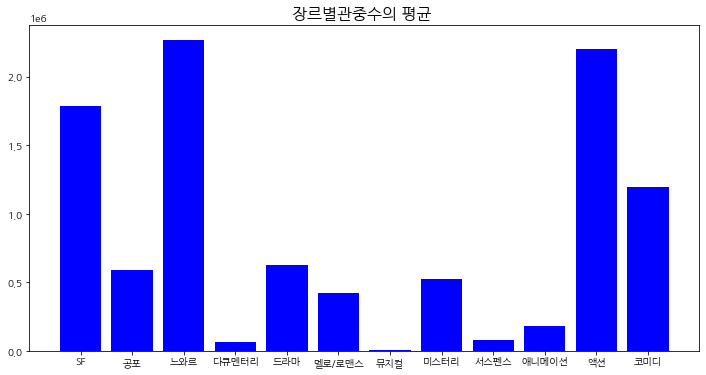

In [ ]:
#import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.rc('font', family='NanumGothic')
plt.bar(audience['genre'], audience['box_off_num'], color='blue')

plt.title("장르별관중수의 평균 ", fontsize=16)


In [ ]:
#년도 별 최대 관중수의 변화를 그래프로 나타내어 보고 싶다면?
#년도 별 최대 관중수를 추출하기 #1

movie_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
#년도 별 최대 관중수를 추출하기 #2(시계열 데이터로 변환)

movie_df['n_date']=pd.to_datetime(movie_df['release_time'])
movie_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,n_date
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,2012-11-22
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015-11-19
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013-06-05
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012-07-12
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2010-11-04


In [ ]:
#년도 별 최대 관중수를 추출하기 #2(년도 추출)
movie_df['year']=movie_df['n_date'].dt.year
movie_df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,n_date,year
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398,2012-11-22,2012
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015-11-19,2015
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013-06-05,2013
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012-07-12,2012
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2010-11-04,2010


In [ ]:
# 년도 별 최대 관중수를 추출하기 #4 (년도 별 그룹핑하여 최대 관중수 구하기)

year_max = movie_df.groupby('year')['box_off_num'].max()
year_max = year_max.reset_index()
year_max

,year,box_off_num
0,2010,6178665
1,2011,7482180
2,2012,12983841
3,2013,12811435
4,2014,14262766
5,2015,12706663


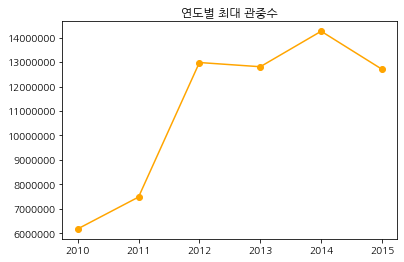

In [ ]:
#plt.ylim([5000000, 15000000])

plt.plot(year_max['year'], year_max['box_off_num'], color='orange', marker='o')
plt.title('연도별 최대 관중수')
# 방법1
plt.ticklabel_format(axis="y", style="plain")   #y축의 값을 지수승으로 표시하지 않고 원래값으로 표시 

plt.savefig("/content/drive/MyDrive/data/연도별 최대 관중수.png")


In [ ]:
# 년도 별 평균 관중수를 추출하기 #4 (년도 별 그룹핑하여 평균 관중수 구하기)

year_mean = movie_df.groupby('year')['box_off_num'].mean()
year_mean = year_mean.reset_index()
year_mean

,year,box_off_num
0,2010,5.416582e+05
1,2011,6.288671e+05
2,2012,9.457252e+05
3,2013,1.007358e+06
4,2014,5.938845e+05
5,2015,5.958692e+05


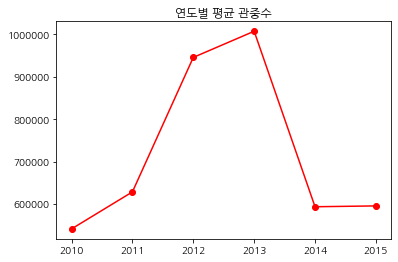

In [ ]:
plt.plot(year_mean['year'], year_mean['box_off_num'], color='red', marker='o')
plt.title('연도별 평균 관중수')

#방법2
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


plt.show()

Text(0.5, 1.0, '연도별 평균 관중수')

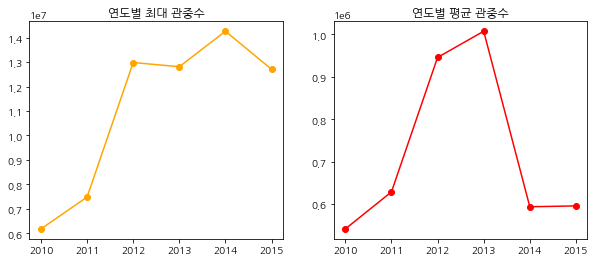

In [ ]:
# 년도 별 최대 관중수와 평균 관중수를 그래프로 나란히 나타내어 볼까요? 
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
plt.plot(year_max['year'], year_max['box_off_num'], color='orange', marker='o')
plt.title('연도별 최대 관중수')


plt.subplot(1,2,2)
plt.plot(year_mean['year'], year_mean['box_off_num'], color='red', marker='o')
plt.title('연도별 평균 관중수')

#plt.show()

In [ ]:
#  영화를 만드는 스태프 수의 분포도를 살펴볼까요?
staff = movie_df['num_staff']

staff.describe()


count    600.000000
mean     151.118333
std      165.654671
min        0.000000
25%       17.000000
50%       82.500000
75%      264.000000
max      869.000000
Name: num_staff, dtype: float64

Text(0.5, 1.0, '스텝 인원수 분포도')

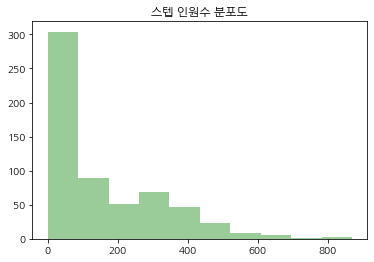

In [ ]:
plt.hist(staff, color='green', alpha=0.4)   #히스토그램으로 그리기
plt.title('스텝 인원수 분포도')
#plt.show()

In [ ]:
#  영화 등급 비율 살펴보기

screeing_rat = movie_df['screening_rat'].value_counts()
screeing_rat

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

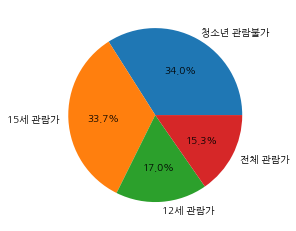

In [ ]:
#파이 차트로 그리기
plt.pie(screeing_rat, labels=screeing_rat.keys(), autopct='%1.1f%%')    
plt.show()

In [4]:
plt.savefig("/content/drive/MyDrive/연도별 최대 관중수.jpg")


NameError: ignored